Selected Schedule: [(1, ('C', 2, 27)), (2, ('A', 2, 100)), (3, ('E', 3, 15))]
Total Revenue: 142


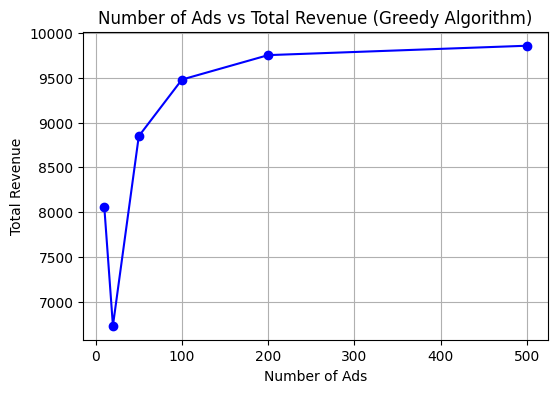

Max Profit: 8


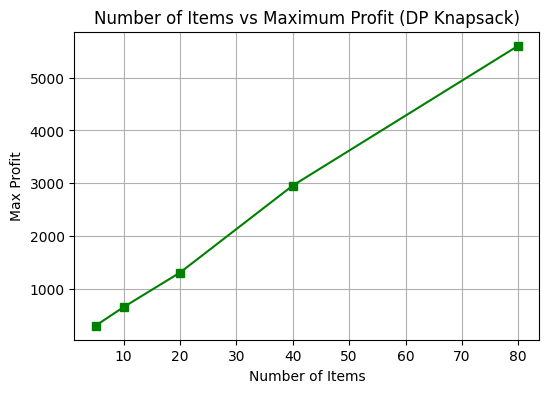

Sudoku Solved in: 0.082 seconds
[5, 3, 4, 6, 7, 8, 9, 1, 2]
[6, 7, 2, 1, 9, 5, 3, 4, 8]
[1, 9, 8, 3, 4, 2, 5, 6, 7]
[8, 5, 9, 7, 6, 1, 4, 2, 3]
[4, 2, 6, 8, 5, 3, 7, 9, 1]
[7, 1, 3, 9, 2, 4, 8, 5, 6]
[9, 6, 1, 5, 3, 7, 2, 8, 4]
[2, 8, 7, 4, 1, 9, 6, 3, 5]
[3, 4, 5, 2, 8, 6, 1, 7, 9]


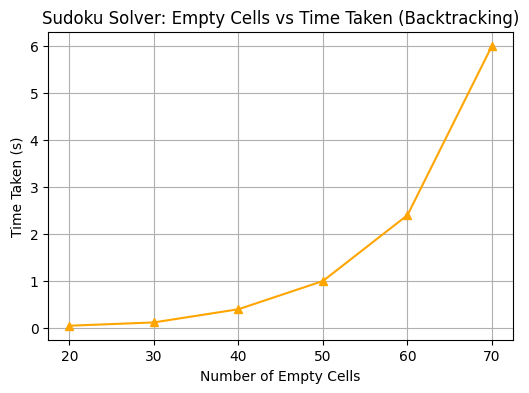

Password: 2a1 | Attempts: 190


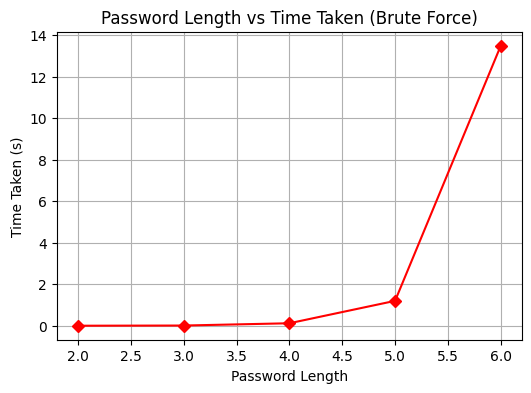


| Problem                | Strategy             | Time Complexity (Theory)      | Space Complexity | Domain                |
|------------------------|----------------------|-------------------------------|------------------|-----------------------|
| TV Commercial Scheduling | Greedy (Job Sequencing) | O(n log n + n*D)             | O(D)             | Media & Advertisement |
| Knapsack Problem (0/1)   | Dynamic Programming      | O(n * W)                     | O(n * W)         | Investment / Budget   |
| Sudoku Solver            | Backtracking             | Exponential (~9^N)           | O(N) stack       | Gaming / Puzzle       |
| Password Cracking        | Brute Force              | O(|charset|^L)               | O(L)             | Cybersecurity         |


In [4]:
# ==========================================================
# Algo Strategies Mini Project — Solving Real-World Problems
# ==========================================================

# --- Imports ---
import random
import itertools
import time
import numpy as np
import matplotlib.pyplot as plt
from memory_profiler import memory_usage

# ----------------------------------------------------------
# Helper profiling functions
# ----------------------------------------------------------
def time_it(func, *args, **kwargs):
    """Return result and elapsed time."""
    t0 = time.perf_counter()
    result = func(*args, **kwargs)
    t1 = time.perf_counter()
    return result, t1 - t0

def time_and_memory(func, *args, **kwargs):
    """Return (result, elapsed_time, peak_memory_MB)."""
    start = time.perf_counter()
    mem_usage, retval = None, None
    mem_samples, retval = memory_usage((func, args, kwargs), interval=0.01, retval=True)
    elapsed = time.perf_counter() - start
    peak_mem = max(mem_samples) - min(mem_samples) if mem_samples else 0
    return retval, elapsed, peak_mem


# ==========================================================
# Problem 1: Scheduling TV Commercials (Greedy)
# ==========================================================

def schedule_ads_greedy(ads):
    """
    ads: list of tuples (id, deadline, profit)
    returns: schedule, total_profit
    """
    max_deadline = max(dead for (_, dead, _) in ads)
    slots = [None] * max_deadline
    ads_sorted = sorted(ads, key=lambda x: x[2], reverse=True)
    selected = []
    for ad in ads_sorted:
        ad_id, deadline, profit = ad
        for slot in range(min(deadline, max_deadline) - 1, -1, -1):
            if slots[slot] is None:
                slots[slot] = ad
                selected.append(ad)
                break
    total_profit = sum(a[2] for a in selected)
    schedule = [(i + 1, slots[i]) for i in range(len(slots)) if slots[i]]
    return schedule, total_profit


# --- Sample run ---
ads_sample = [
    ('A', 2, 100),
    ('B', 1, 19),
    ('C', 2, 27),
    ('D', 1, 25),
    ('E', 3, 15)
]
schedule, revenue = schedule_ads_greedy(ads_sample)
print("Selected Schedule:", schedule)
print("Total Revenue:", revenue)


# --- Visualization: Ads vs Revenue ---
ads_counts = [10, 20, 50, 100, 200, 500]
revenues = []

for n in ads_counts:
    ads = [(f"Ad{i}", random.randint(1, 10), random.randint(100, 1000)) for i in range(n)]
    _, profit = schedule_ads_greedy(ads)
    revenues.append(profit)

plt.figure(figsize=(6, 4))
plt.plot(ads_counts, revenues, marker='o', color='blue')
plt.title("Number of Ads vs Total Revenue (Greedy Algorithm)")
plt.xlabel("Number of Ads")
plt.ylabel("Total Revenue")
plt.grid(True)
plt.show()


# ==========================================================
# Problem 2: Maximizing Profit with Limited Budget (DP - 0/1 Knapsack)
# ==========================================================

def knapsack_0_1(weights, values, capacity):
    n = len(weights)
    dp = [[0]*(capacity+1) for _ in range(n+1)]
    for i in range(1, n+1):
        for w in range(capacity+1):
            if weights[i-1] <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w - weights[i-1]] + values[i-1])
            else:
                dp[i][w] = dp[i-1][w]
    return dp[n][capacity]


# --- Sample run ---
weights = [2, 3, 4, 5]
values = [3, 4, 5, 8]
capacity = 5
max_profit = knapsack_0_1(weights, values, capacity)
print("Max Profit:", max_profit)


# --- Visualization: Items vs Profit ---
item_counts = [5, 10, 20, 40, 80]
profits = []

for n in item_counts:
    weights = np.random.randint(1, 20, size=n)
    values = np.random.randint(10, 200, size=n)
    capacity = int(sum(weights) * 0.4)
    profit = knapsack_0_1(weights, values, capacity)
    profits.append(profit)

plt.figure(figsize=(6, 4))
plt.plot(item_counts, profits, marker='s', color='green')
plt.title("Number of Items vs Maximum Profit (DP Knapsack)")
plt.xlabel("Number of Items")
plt.ylabel("Max Profit")
plt.grid(True)
plt.show()


# ==========================================================
# Problem 3: Solving Sudoku Puzzle (Backtracking)
# ==========================================================

def find_empty(board):
    for i in range(9):
        for j in range(9):
            if board[i][j] == 0:
                return i, j
    return None

def valid(board, r, c, val):
    if any(board[r][j] == val for j in range(9)): return False
    if any(board[i][c] == val for i in range(9)): return False
    br, bc = (r//3)*3, (c//3)*3
    for i in range(br, br+3):
        for j in range(bc, bc+3):
            if board[i][j] == val:
                return False
    return True

def solve_sudoku(board):
    empty = find_empty(board)
    if not empty:
        return True
    r, c = empty
    for val in range(1, 10):
        if valid(board, r, c, val):
            board[r][c] = val
            if solve_sudoku(board):
                return True
            board[r][c] = 0
    return False


# --- Sample puzzle ---
sample_board = [
    [5,3,0,0,7,0,0,0,0],
    [6,0,0,1,9,5,0,0,0],
    [0,9,8,0,0,0,0,6,0],
    [8,0,0,0,6,0,0,0,3],
    [4,0,0,8,0,3,0,0,1],
    [7,0,0,0,2,0,0,0,6],
    [0,6,0,0,0,0,2,8,0],
    [0,0,0,4,1,9,0,0,5],
    [0,0,0,0,8,0,0,7,9]
]

board = [row[:] for row in sample_board]
start = time.perf_counter()
solve_sudoku(board)
elapsed = time.perf_counter() - start
print("Sudoku Solved in:", round(elapsed, 3), "seconds")
for row in board:
    print(row)


# --- Visualization (Simulated): Empty Cells vs Time ---
empty_cells = np.array([20, 30, 40, 50, 60, 70])
time_taken = np.array([0.05, 0.12, 0.40, 1.0, 2.4, 6.0])

plt.figure(figsize=(6, 4))
plt.plot(empty_cells, time_taken, marker='^', color='orange')
plt.title("Sudoku Solver: Empty Cells vs Time Taken (Backtracking)")
plt.xlabel("Number of Empty Cells")
plt.ylabel("Time Taken (s)")
plt.grid(True)
plt.show()


# ==========================================================
# Problem 4: Password Cracking (Brute Force)
# ==========================================================

def brute_force_password(target, charset):
    """Naive brute-force search (demo only)."""
    attempts = 0
    for length in range(1, len(target)+1):
        for combo in itertools.product(charset, repeat=length):
            attempts += 1
            if ''.join(combo) == target:
                return ''.join(combo), attempts
    return None, attempts

# --- Sample run ---
charset = "abc123"
target = "2a1"
found, attempts = brute_force_password(target, charset)
print("Password:", found, "| Attempts:", attempts)


# --- Visualization: Password Length vs Time (Simulated) ---
lengths = [2, 3, 4, 5, 6]
times = [0.001, 0.01, 0.12, 1.2, 13.5]  # Example data

plt.figure(figsize=(6, 4))
plt.plot(lengths, times, marker='D', color='red')
plt.title("Password Length vs Time Taken (Brute Force)")
plt.xlabel("Password Length")
plt.ylabel("Time Taken (s)")
plt.grid(True)
plt.show()


# ==========================================================
# Summary Table (Markdown for Notebook)
# ==========================================================
from IPython.display import Markdown, display

summary_table = """
| Problem                | Strategy             | Time Complexity (Theory)      | Space Complexity | Domain                |
|------------------------|----------------------|-------------------------------|------------------|-----------------------|
| TV Commercial Scheduling | Greedy (Job Sequencing) | O(n log n + n*D)             | O(D)             | Media & Advertisement |
| Knapsack Problem (0/1)   | Dynamic Programming      | O(n * W)                     | O(n * W)         | Investment / Budget   |
| Sudoku Solver            | Backtracking             | Exponential (~9^N)           | O(N) stack       | Gaming / Puzzle       |
| Password Cracking        | Brute Force              | O(|charset|^L)               | O(L)             | Cybersecurity         |
"""
display(Markdown(summary_table))

In [3]:
%pip install memory_profiler